In [1]:
%matplotlib inline
import pyautogui
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter
from pytesseract import image_to_string
from PIL import Image
import time

from IPython.display import clear_output

from srbot import *

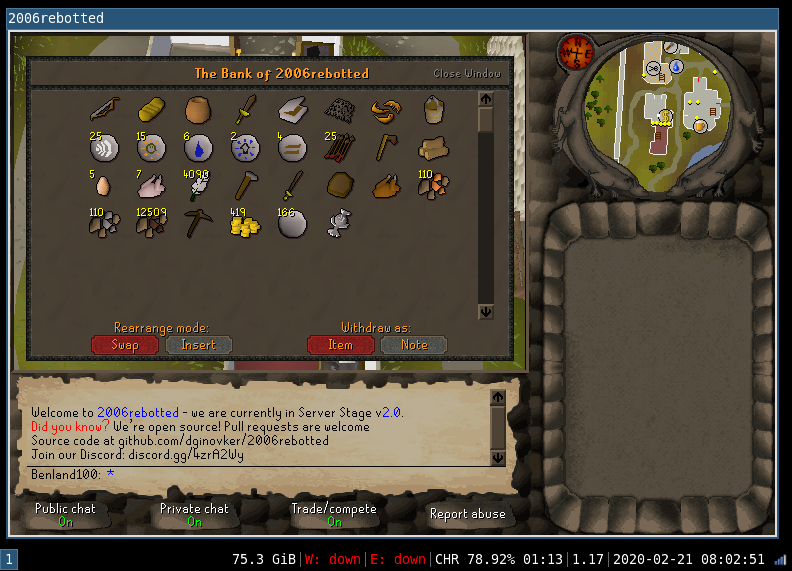

In [5]:
pyautogui.screenshot()

In [6]:
target()
polish_minimap()

best: 13 @ 70.10 deg
best: 14 @ 58.80 deg
best: 15 @ 46.63 deg
best: 16 @ 42.36 deg
best: 18 @ 10.62 deg
best: 20 @ 7.54 deg
best: 34 @ 0.78 deg


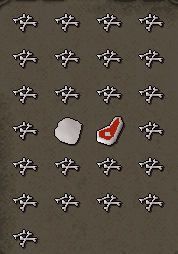

In [4]:
inv_capture = get_inventory()
Image.fromarray(inv_capture)

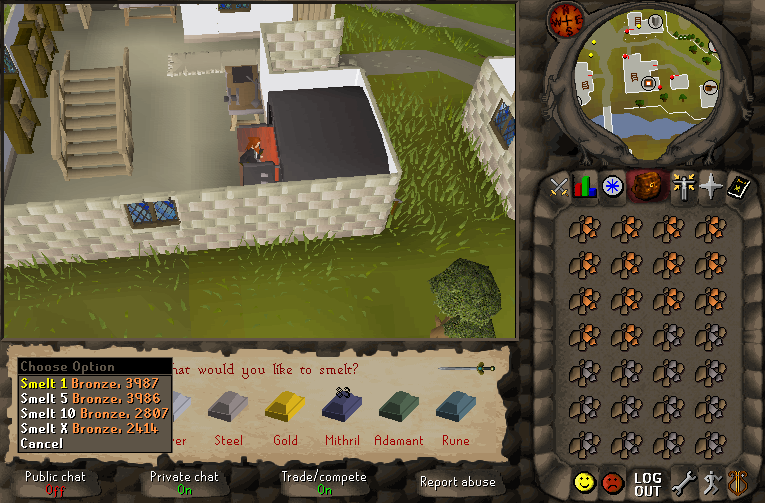

In [4]:
target()
sleep(3)
ms_capture = get_client()
Image.fromarray(ms_capture)

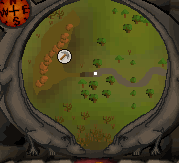

In [9]:
mm_capture = get_minimap()
Image.fromarray(mm_capture)

In [10]:
minimap = get_minimap()
len(find_colors([0,0,0],minimap,0.001))

9019

In [ ]:
polish_minimap(min_same=35,horizontal=False)

In [148]:
# Echos coords and colors
target()
try:
    while True:
        sleep(1)
        target()
        x,y = pyautogui.position()
        print('%i,%i [%i,%i,%i]'%(x-client_pos[0],y-client_pos[1],*np.asarray(pyautogui.screenshot(region=[x,y,1,1]))[0,0]))
except KeyboardInterrupt:
    pass

190,473 [46,42,36]
696,458 [86,77,66]
719,482 [50,17,17]
712,483 [122,122,122]
712,483 [122,122,122]
712,483 [122,122,122]
712,483 [122,122,122]
712,483 [122,122,122]
629,261 [124,29,27]
627,267 [0,0,0]
627,267 [0,0,0]
627,267 [0,0,0]
-8,57 [0,0,0]


In [31]:
#take delayed snapshot of client regions for analysis
sleep(2.0)
target()
mainscreen = get_mainscreen()
inventory = get_inventory()
minimap = get_minimap()
uptext = get_uptext()

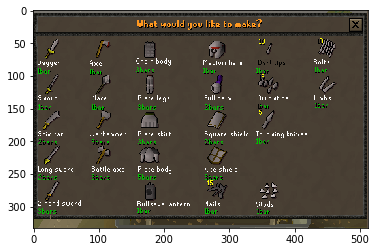

In [116]:
plt.imshow(ms_capture)

271 496


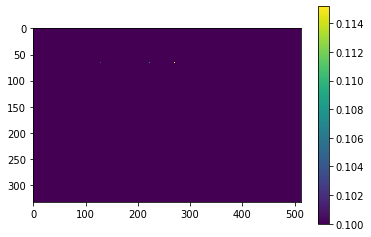

In [80]:
coal_ore = load_image('coal_ore.png')
iron_ore = load_image('iron_ore.png')

found = find_bitmap_prob(coal_ore,ms_capture,mode='xcorr')
argmax = np.argmin(found)
x,y = int(argmax/found.shape[1]),int(argmax%found.shape[1])
print(x,y)
#found[x-5:x+5,y-5:y+5] = 9999
found[found<0.1] = 0.1
found[found>0.2] = 0.2
plt.imshow(found)
plt.colorbar()

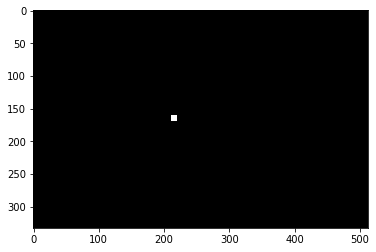

In [141]:
bmp = load_image('steel_plate.png')

pts = find_bitmap(bmp,ms_capture,mode='hsl',tol=0.2)
found = np.zeros_like(ms_capture)
for x,y in pts:
    #print(x,y)
    found[x-5:x+5,y-5:y+5] = [255,255,255]
_=plt.imshow(found)

(0, 10)

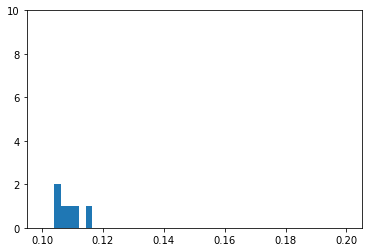

In [49]:
plt.hist(found.flatten(),bins=np.linspace(0.1,0.2,50))
plt.ylim(0,10)

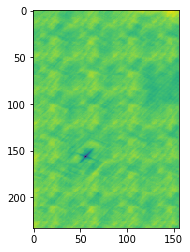

In [32]:
bmp = load_image('gold_bar.png')
result = find_bitmap_prob(bmp,inventory,mode='dist')
plt.imshow(result)

(0, 10)

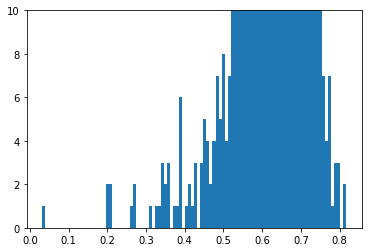

In [33]:
_ = plt.hist(result.reshape((-1)),bins=100)
plt.ylim(0,10)

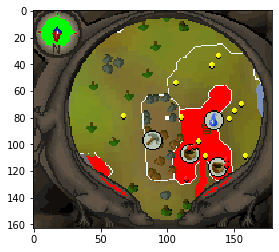

In [109]:
minimap = get_minimap()

falador_wall = [189,175,152]
agility_color = [1,161,43]
rimm_road = [117,109,108]

rr = find_colors(rimm_road,minimap,tol=(0.07,0.2,0.15),mode='hsl') # [mmxc-mmxs,mmyc-mmys]
rr = filter_near(rr,[[mmxc-mmxs,mmyc-mmys]],65)
fw = find_colors(falador_wall,minimap,tol=(0.07,0.2,0.15),mode='hsl') # - [mmxc-mmxs,mmyc-mmys]
fw = filter_far(fw,rr,10)

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[:] = minimap[:]
if len(rr) > 0:
    highlight[rr[:,1],rr[:,0]] = [255,0,0]
highlight[fw[:,1],fw[:,0]] = [0,255,0]

plt.imshow(highlight)
plt.show()

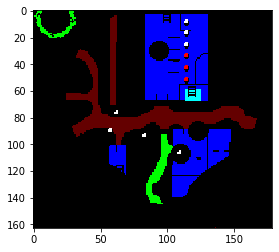

In [256]:
minimap = get_minimap()

mm_floor = [94,87,54]
mm_ew_road = [124,122,115]
mm_s_road = [131,123,89]

a = find_colors(mm_ew_road,minimap,tol=(0.04,0.08,0.08),mode='hsl') #mm_ew_road
b = find_colors(mm_s_road,minimap,tol=(0.04,0.08,0.06),mode='hsl') #mm_s_road
c = find_colors(mm_floor,minimap,tol=(0.04,0.08,0.08),mode='hsl') #mm_floor
map_dark = find_colors([0,0,0],minimap,0.001)
npcs = find_colors([255,255,0],minimap,tol=0.05,mode='hsl')

bankers = filter_far(filter_near(npcs,map_dark,30),b,15)

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[a[:,1],a[:,0]] = [100,0,0]
highlight[b[:,1],b[:,0]] = [0,255,0]
highlight[c[:,1],c[:,0]] = [0,0,255]
highlight[map_dark[:,1],map_dark[:,0]] = [0,255,255]
highlight[npcs[:,1],npcs[:,0]] = [255,255,255]
highlight[bankers[:,1],bankers[:,0]] = [255,0,0]

plt.imshow(highlight)
plt.show()

ladder [58.77692308 64.7       ]


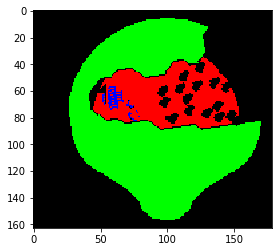

In [35]:
minimap = get_minimap()

mm_cave = [121,93,28]
mm_ladder = [85,49,0]

a = find_colors(mm_cave,minimap,tol=0.12,mode='dist')
a = filter_radius(a,[mmxc-mmxs,mmyc-mmys],55)

b = find_colors(mm_ladder,minimap,tol=0.05,mode='dist')
b = filter_radius(b,[mmxc-mmxs,mmyc-mmys],55)
clusters,counts = cluster(b,radius=2)
if len(counts) > 0 and np.max(counts) > 50:
    ladder = clusters[np.argmax(counts)]
    print('ladder',np.mean(ladder,axis=0))

c = find_colors([0,0,0],minimap,0.001)
center_of_dark = np.mean(c-[mmxc-mmxs,mmyc-mmys],axis=0)

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[c[:,1],c[:,0]] = [0,255,0]

plt.imshow(highlight)
plt.show()

[389 203 299]


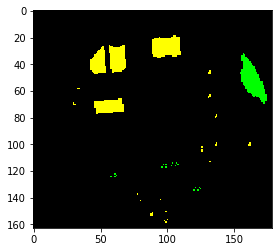

In [139]:
minimap = get_minimap()
floor1 = find_colors([54,43,8],minimap,tol=(0.05,0.08,0.1),mode='hsl')
floor2 = find_colors([91,56,31],minimap,tol=(0.05,0.08,0.1),mode='hsl')
water = find_colors([124,143,184],minimap,tol=(0.1,0.1,0.1),mode='hsl')
floor1 = filter_far(floor1,water,20)
floor2 = filter_far(floor2,water,20)
floors = []
if len(floor1) > 0:
    floors.extend(floor1)
if len(floor2) > 0:
    floors.extend(floor2)
floors = np.asarray(floors)
floors = floors if len(floors) else floors
clusters,counts = cluster(floors,10)
mask = counts > 30
clusters,counts = clusters[mask],counts[mask]
print(counts)

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[floor1[:,1],floor1[:,0]] = [0,0,255]
highlight[floor1[:,1],floor1[:,0]] = [255,0,0]
highlight[floors[:,1],floors[:,0]] = [255,255,0]
highlight[water[:,1],water[:,0]] = [0,255,0]

plt.imshow(highlight)
plt.show()

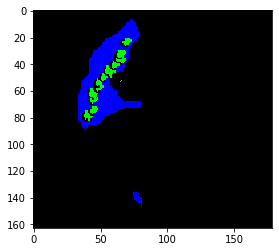

In [11]:
minimap = get_minimap()
mine_rock_color = [154,91,39]
mine_area_color = [98,80,23]
a = find_colors(mine_rock_color,minimap,tol=(0.05,0.08,0.1),mode='hsl')
b = find_colors(mine_area_color,minimap,tol=(0.03,0.1,0.1),mode='hsl')
rocks = filter_near(a,b,5)

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[rocks[:,1],rocks[:,0]] = [0,255,0]

plt.imshow(highlight)
plt.show()

[35  1  1  1  1  1  2  1  2  1  1  1  1  1  2  1  1  1  2  1  1  1  2  1
  1]


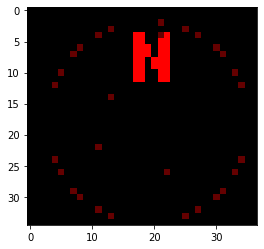

In [197]:
minimap = get_compass()
a = find_colors([63,0,0],minimap,tol=(0.01,0.01,0.01),mode='hsl')
clusters,counts = cluster(a,radius=2)
print(counts)
b = clusters[np.argmax(counts)]

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[a[:,1],a[:,0]] = [100,0,0]
highlight[b[:,1],b[:,0]] = [255,0,0]

plt.imshow(highlight)
plt.show()

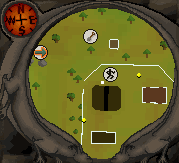

In [13]:
Image.fromarray(get_minimap())

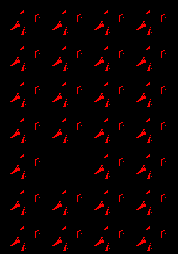

In [36]:
inventory = get_inventory()
a = find_colors([119,96,67],inventory,tol=0.02)

highlight = np.zeros_like(inventory,dtype='uint8')
highlight[a[:,1],a[:,0]] = [255,0,0]

Image.fromarray(highlight)

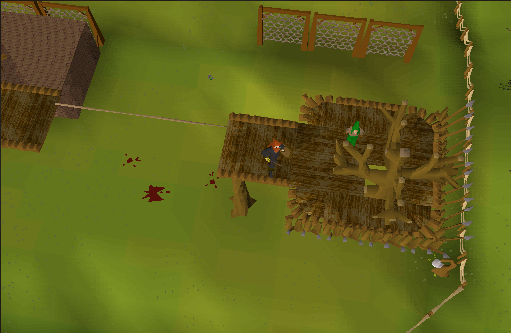

In [133]:
ms_capture = get_mainscreen()
Image.fromarray(ms_capture)

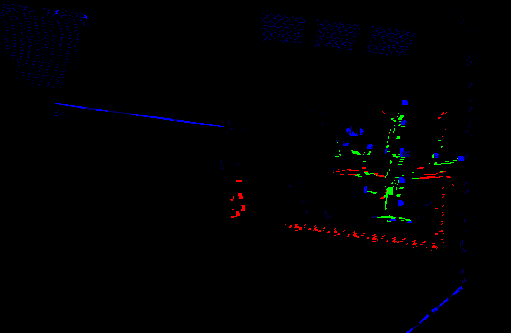

In [134]:
tree = find_colors([103,78,26],ms_capture,mode='hsl',tol=(0.01,0.02,0.02))
knot = find_colors([131,105,73],ms_capture,mode='hsl',tol=(0.02,0.1,0.1))
clusters,counts = cluster(knot,radius=1)
mask = np.logical_and(counts > 8, counts < 30)
clusters,counts = clusters[mask],counts[mask]
click = filter_near(tree,np.concatenate(clusters),15)
            
highlight = np.zeros_like(ms_capture,dtype='uint8')

highlight[tree[:,1],tree[:,0]] = [255,0,0]
highlight[knot[:,1],knot[:,0]] = [0,0,100]
for knot in clusters:
    highlight[knot[:,1],knot[:,0]] = [0,0,255]
    
highlight[click[:,1],click[:,0]] = [0,255,0]


Image.fromarray(highlight)

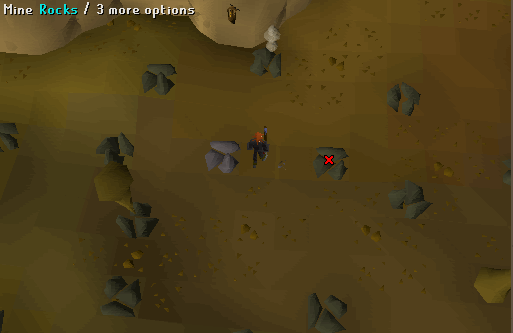

In [230]:
Image.fromarray(ms_capture)

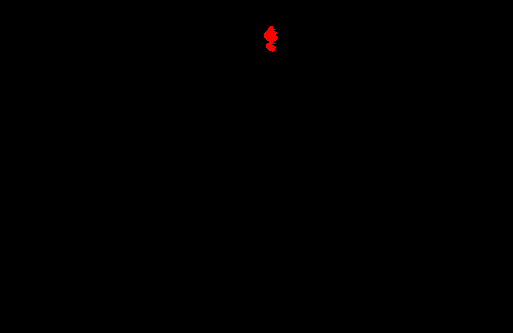

In [244]:
a = find_colors([163,151,126],ms_capture,mode='hsl',tol=(0.08,0.1,0.2))
b = find_colors([105,77,37],ms_capture,tol=0.02)
c = find_colors([128,104,54],ms_capture,tol=0.02)
ladder = filter_near(a,b,10)
ladder = filter_near(ladder,c,10)
highlight = np.zeros_like(ms_capture,dtype='uint8')

highlight[a[:,1],a[:,0]] = [255,0,0]
#highlight[b[:,1],b[:,0]] = [0,0,255]
#highlight[c[:,1],c[:,0]] = [0,255,0]
#highlight[ladder[:,1],ladder[:,0]] = [255,255,0]

Image.fromarray(highlight)

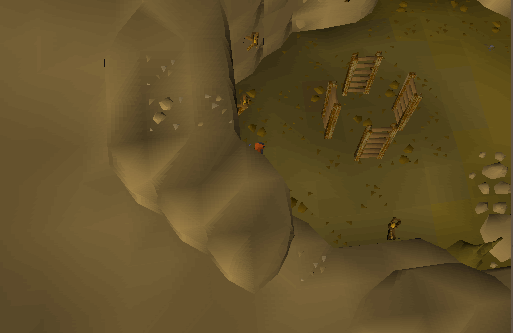

In [227]:
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

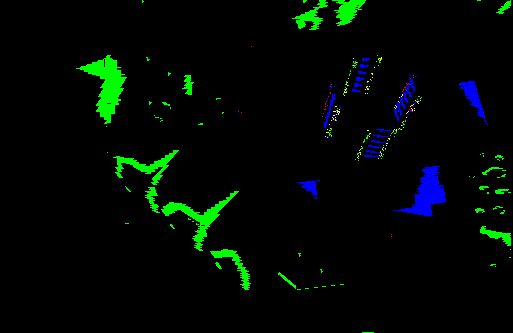

In [228]:
a = find_colors([104,64,12],mainscreen,tol=0.02)
b = find_colors([105,77,37],mainscreen,tol=0.02)
c = find_colors([128,104,54],mainscreen,tol=0.02)
ladder = filter_near(a,b,10)
ladder = filter_near(ladder,c,10)
highlight = np.zeros_like(mainscreen,dtype='uint8')

highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[c[:,1],c[:,0]] = [0,255,0]
highlight[ladder[:,1],ladder[:,0]] = [255,255,0]

Image.fromarray(highlight)

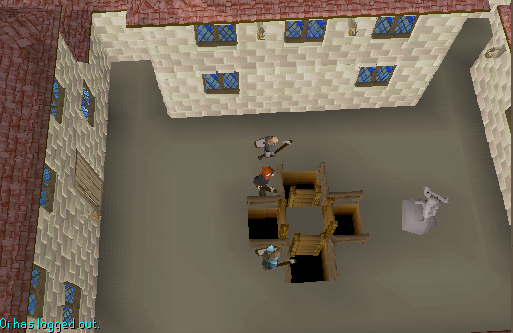

In [37]:
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

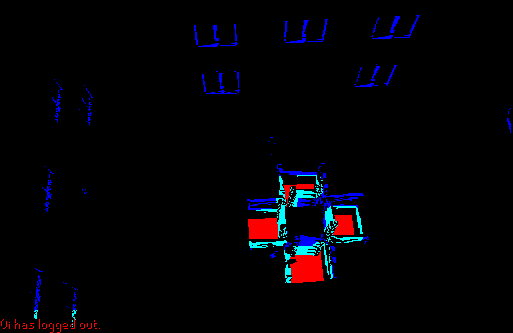

In [38]:
a = find_colors([0,0,0],mainscreen,tol=0.05)
b = find_colors([105,77,37],mainscreen,tol=0.05)
ladder = filter_near(b,a,10)
highlight = np.zeros_like(mainscreen,dtype='uint8')

highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[ladder[:,1],ladder[:,0]] = [0,255,255]

Image.fromarray(highlight)

2949


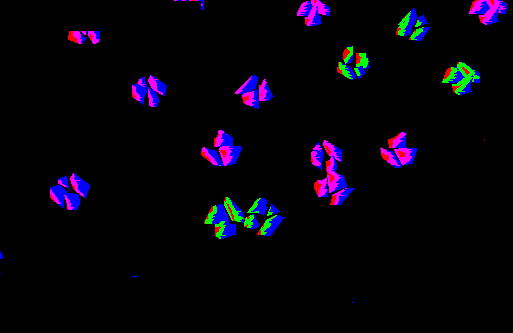

In [39]:
mainscreen = get_mainscreen()

a = find_colors([84,85,126],mainscreen,tol=(0.07,0.1,0.1),mode='hsl')
b = find_colors([45,45,66],mainscreen,tol=(0.07,0.1,0.1),mode='hsl')
mith = filter_near(a,b,4)

c = find_colors([63,63,41],mainscreen,tol=(0.07,0.1,0.05),mode='hsl')
d = find_colors([35,35,23],mainscreen,tol=(0.07,0.1,0.05),mode='hsl')
coal = filter_near(c,d,4)
#clusters,counts = cluster(altar)
#if len(counts) > 5 and np.max(counts) > 1000:
#    found = clusters[np.argmax(counts)]
#print(counts)

highlight = np.zeros_like(mainscreen,dtype='uint8')

highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[c[:,1],c[:,0]] = [255,0,0]
highlight[d[:,1],d[:,0]] = [0,0,255]
print(len(coal))
if len(mith) > 0:
    highlight[mith[:,1],mith[:,0]] = [0,255,0]
if len(coal) > 0:
    highlight[coal[:,1],coal[:,0]] = [255,0,255]

Image.fromarray(highlight)

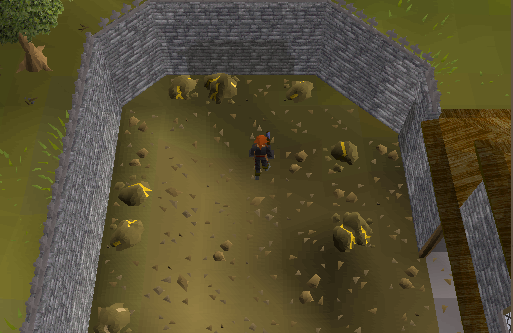

In [18]:
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

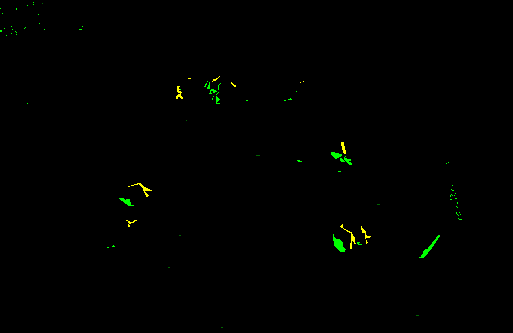

In [102]:
a = find_colors([49,42,22],mainscreen,mode='hsl',tol=(0.05,0.1,0.02))
b = find_colors([23,20,11],mainscreen,mode='hsl',tol=(0.05,0.2,0.04))
c = find_colors([251,204,31],mainscreen,mode='hsl',tol=(0.05,0.2,0.3))

rocks = filter_near(b,a,10)
gold = filter_near(c,b,30)

highlight = np.zeros_like(mainscreen,dtype='uint8')

#highlight[a[:,1],a[:,0],0] = 100
highlight[b[:,1],b[:,0],1] = 100
highlight[rocks[:,1],rocks[:,0]] = [0,255,0]
highlight[c[:,1],c[:,0],0] = 100
highlight[gold[:,1],gold[:,0]] = [255,255,0]

Image.fromarray(highlight)

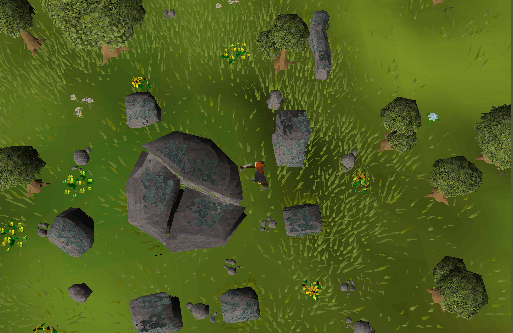

In [181]:
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

[3179   76  166  292  213   73   89  103  397    3  375   49   53   46
   44   12   86   52   14    2   35    5   13   36    8   16    5   31
    4    4    3    1    4    3    1    2]


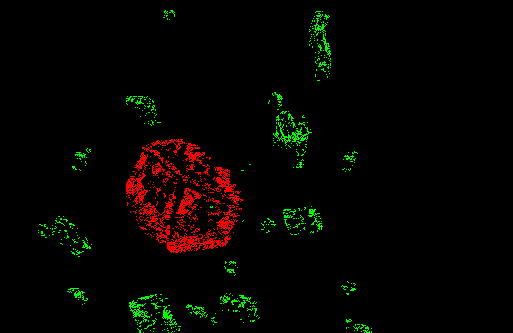

In [180]:
a = find_colors([74,72,70],mainscreen,tol=(0.07,0.1,0.1),mode='hsl')
b = find_colors([64,64,64],mainscreen,tol=(0.07,0.1,0.1),mode='hsl')
altar = filter_near(a,b,10)
clusters,counts = cluster(altar)
if len(counts) > 5 and np.max(counts) > 1000:
    found = clusters[np.argmax(counts)]
print(counts)

highlight = np.zeros_like(mainscreen,dtype='uint8')
#highlight[b[:,1],b[:,0]] = [0,255,255]
#highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[altar[:,1],altar[:,0]] = [0,255,0]
highlight[found[:,1],found[:,0]] = [255,0,0]

Image.fromarray(highlight)

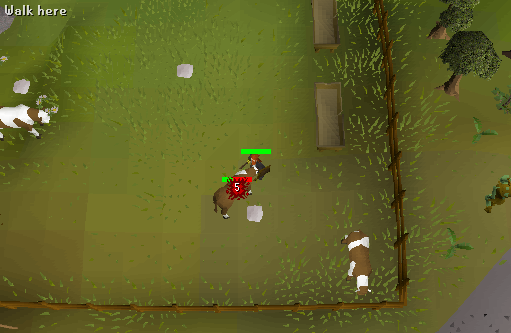

In [7]:
target()
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

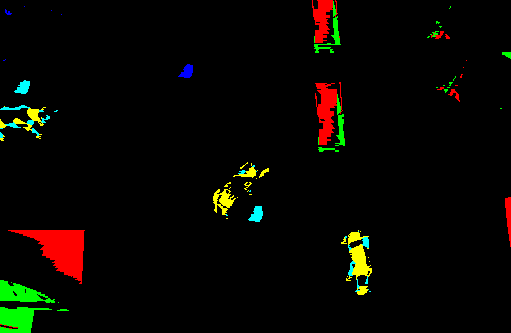

In [11]:
a = find_colors([122,89,43],mainscreen,tol=(0.05,0.2,0.05),mode='hsl')
b = find_colors([64,46,23],mainscreen,tol=(0.05,0.2,0.05),mode='hsl')
c = find_colors([200,200,200],mainscreen,tol=(0.2,0.1,0.1),mode='hsl')
cow_white = filter_near(filter_near(c,b,50),a,50)
cows = np.concatenate([filter_near(a,cow_white,50),filter_near(b,cow_white,50)])
    
highlight = np.zeros_like(mainscreen,dtype='uint8')
highlight[c[:,1],c[:,0]] = [0,0,255]
highlight[b[:,1],b[:,0]] = [0,255,0]
highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[cow_white[:,1],cow_white[:,0]] = [0,255,255]
highlight[cows[:,1],cows[:,0]] = [255,255,0]

Image.fromarray(highlight)

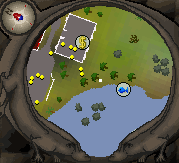

In [177]:
minimap = get_minimap()
Image.fromarray(minimap)

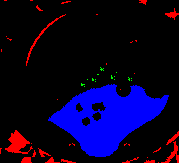

In [176]:
mm_willow = [24,30,1]
mm_water = [125,144,185]

a = find_colors(mm_willow,minimap,tol=0.05,mode='dist')
b = find_colors(mm_water,minimap,tol=(0.05,0.2,0.1),mode='hsl')
willows = filter_near(a,b,20)
willows = filter_radius(willows,[mmxc-mmxs,mmyc-mmys],55)
clusters,counts = cluster(willows,radius=5)
mask = np.logical_and(counts>5,counts<20)

highlight = np.zeros_like(minimap,dtype='uint8')
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[a[:,1],a[:,0]] = [255,0,0]

if np.count_nonzero(mask) > 0:
    willows = np.concatenate(clusters[mask])
    clusters,counts = cluster(willows,radius=20)
    willows = np.asarray(clusters[np.argmax(counts)],dtype=np.int32)
    
    highlight[willows[:,1],willows[:,0]] = [0,255,0]

Image.fromarray(highlight)

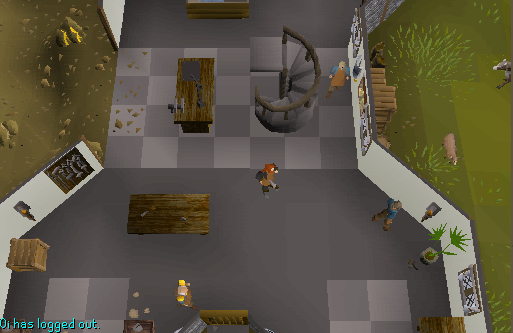

In [119]:
target()
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

27995 69477 47 6050
in_mine False
in_guild True


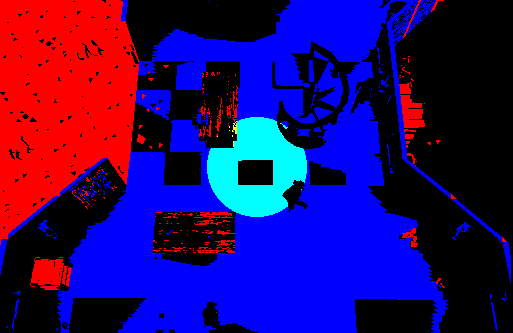

In [118]:
mainscreen = get_mainscreen()

a,b = [98,83,43],[87,81,81]
a = find_colors(a,mainscreen,tol=(0.03,0.08,0.2),mode='hsl')
b = find_colors(b,mainscreen,tol=(1.0,0.05,0.08),mode='hsl')

anear = filter_near(a,[[msxc-msxs,msyc-msys]],50)
bnear = filter_near(b,[[msxc-msxs,msyc-msys]],50)
print(len(a),len(b),len(anear),len(bnear))

in_mine = len(a) > 45000 and (len(anear)+len(bnear)) > 3000
in_guild = len(b) > 25000
print('in_mine',in_mine)
print('in_guild',in_guild)
                     
highlight = np.zeros_like(mainscreen,dtype='uint8')
highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[anear[:,1],anear[:,0]] = [255,255,0]
highlight[bnear[:,1],bnear[:,0]] = [0,255,255]
Image.fromarray(highlight)

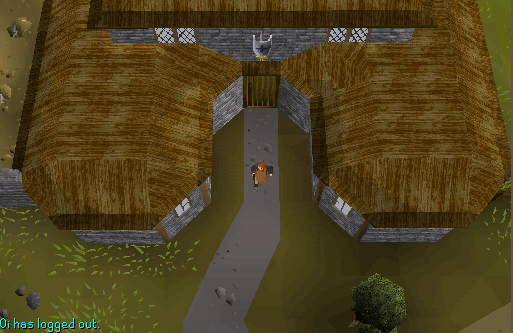

In [124]:
target()
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

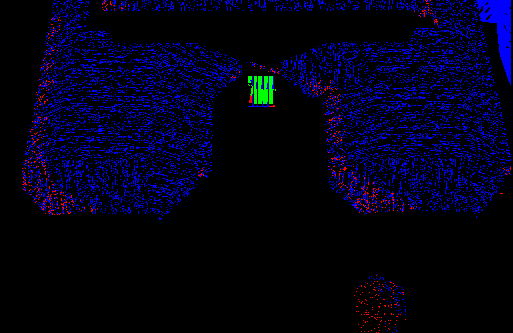

In [125]:
a,b = [43,33,8],[103,78,26]
a = find_colors(a,mainscreen,tol=(1.0,0.08,0.08),mode='hsl')
b = find_colors(b,mainscreen,tol=(1.0,0.08,0.08),mode='hsl')
found = filter_near(a,b,20)
clusters,counts = cluster(found,radius=2)
found = clusters[np.argmax(counts)]

highlight = np.zeros_like(mainscreen,dtype='uint8')
highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[b[:,1],b[:,0]] = [0,0,255]
highlight[found[:,1],found[:,0]] = [0,255,0]
Image.fromarray(highlight)

In [ ]:
target()
minimap=get_minimap()

a = find_colors([111,80,43],minimap,tol=(0.1,0.1,0.1),mode='hsl')
b = find_colors([124,143,184],minimap,tol=(0.1,0.1,0.1),mode='hsl')
a = filter_far(a,b,20)
floors = a-[mmxc-mmxs,mmyc-mmys] if len(a) else a
clusters,counts = cluster(floors,10)
clusters = clusters[np.argsort(-counts)]
if len(counts) == 1: #middle platform
    print('climb limb')
    mainscreen = get_mainscreen()
    limb = find_colors([111,85,26],mainscreen,tol=0.03,mode='hsl')
    floor = find_colors([80,56,42],mainscreen,tol=0.03,mode='hsl')
    climb = filter_near(limb,np.mean(floor.T,axis=1),20)
    np.random.shuffle(climb)
    if len(climb):
        click_mouse(*(climb[0]+[msxs,msys]))
    highlight = np.zeros_like(mainscreen)
    highlight[limb[:,1],limb[:,0]] = [255,0,0]
    highlight[floor[:,1],floor[:,0]] = [0,255,0]
    #highlight[climb[:,1],climb[:,0]] = [0,0,255]
elif len(counts) > 1:
    centers = np.asarray([np.mean(cluster.T,axis=1) for cluster in clusters])
    dists = np.sqrt(np.sum(np.square(centers),axis=1))
    print(dists)
    if np.min(dists) > 50: #just climbed down
        print('walking to rope net two')
        click_mouse(mmxc,mmyc-15)
    else:
        near = np.argmin(dists)
        print('nearest:',near)
        if near == 0: #at log ropes
            if centers[near,1] < 0:
                print('walk to rope net')
                click_mouse(*(centers[2]+[mmxc,mmyc-15]))
            else:
                print('do log balance')
                mainscreen = get_mainscreen()
                log = find_colors([99,59,8],mainscreen,mode='hsl',tol=0.1)
                clusters,counts = cluster(log)
                log = clusters[np.argmax(counts)]
                grass = find_colors([139,145,35],mainscreen,mode='hsl',tol=0.1)
                dirt = find_colors([102,81,35],mainscreen,mode='hsl',tol=0.1)
                balance = filter_near(filter_near(log,grass,20),dirt,20)
                np.random.shuffle(balance)
                if len(balance) > 0:
                    click_mouse(*(balance[0]+[msxs,msys]))
                highlight = np.zeros_like(mainscreen)
                highlight[log[:,1],log[:,0]] = [255,0,0]
                highlight[grass[:,1],grass[:,0]] = [0,255,0]
                highlight[dirt[:,1],dirt[:,0]] = [0,0,255]
                highlight[balance[:,1],balance[:,0]] = [255,0,255]
        elif near == 1: #going to pipes
            if centers[near,1] > 0:
                print('walk to log balance')
                click_mouse(*(centers[0]+[mmxc,mmyc-15]))
            else:
                if np.min(dists) > 35: 
                    mainscreen = get_mainscreen()
                    net = find_colors([120,96,70],mainscreen,mode='hsl',tol=0.05)
                    border = find_colors([111,68,13],mainscreen,mode='hsl',tol=0.05)
                    clusters,counts = cluster(border,10)
                    border = clusters[np.argmax(counts)]
                    climb = filter_near(net,border,10)
                    np.random.shuffle(climb)
                    if len(climb):
                        click_mouse(*(climb[0]+[msxs,msys]))
                    highlight = np.zeros_like(mainscreen)
                    highlight[net[:,1],net[:,0]] = [255,0,0]
                    highlight[border[:,1],border[:,0]] = [0,255,0]
                    highlight[climb[:,1],climb[:,0]] = [0,0,255]
                else:
                    print('go through pipes')
                    mainscreen = get_mainscreen()
                    pipes = find_colors([122,113,113],mainscreen,mode='hsl',tol=0.05)
                    clusters,counts = cluster(pipes)
                    pipes = np.concatenate(clusters[counts > 50])
                    np.random.shuffle(pipes)
                    if len(pipes) > 0:
                        click_mouse(*(pipes[0]+[msxs,msys]))
                    highlight = np.zeros_like(mainscreen)
                    highlight[pipes[:,1],pipes[:,0]] = [255,0,0]
                    
        elif near == 2: #going to climb up
            print('climb rope net')
            mainscreen = get_mainscreen()
            net = find_colors([120,96,70],mainscreen,mode='hsl',tol=0.05)
            border = find_colors([111,68,13],mainscreen,mode='hsl',tol=0.05)
            clusters,counts = cluster(border,10)
            border = clusters[np.argmax(counts)]
            climb = filter_near(net,border,10)
            np.random.shuffle(climb)
            if len(climb):
                click_mouse(*(climb[0]+[msxs,msys]))
            highlight = np.zeros_like(mainscreen)
            highlight[net[:,1],net[:,0]] = [255,0,0]
            highlight[border[:,1],border[:,0]] = [0,255,0]
            highlight[climb[:,1],climb[:,0]] = [0,0,255]
        
else:
    walls = find_colors([238,238,238],minimap,tol=0.1)-[mmxc-mmxs,mmyc-mmys]
    delta = np.mean(walls[:,0])
    if delta > 0:
        print('top left')
        mainscreen = get_mainscreen()
        grass = find_colors([107,118,28],mainscreen,mode='hsl',tol=0.01)
        rope = find_colors([166,134,93],mainscreen,mode='hsl',tol=0.05)
        walk = filter_near(rope,grass,4)
        if len(walk) > 0:
            point = closest([msxc,msyc],walk)
            click_mouse(*(point+[msxs,msys]))
        
        highlight = np.zeros_like(mainscreen)
        highlight[grass[:,1],grass[:,0]] = [255,0,0]
        highlight[rope[:,1],rope[:,0]] = [0,255,0]
        highlight[climb[:,1],climb[:,0]] = [0,0,255]
    else:
        print('top right')        
        mainscreen = get_mainscreen()
        tree = find_colors([103,78,26],mainscreen,mode='hsl',tol=0.05)
        knot = find_colors([131,105,73],mainscreen,mode='hsl',tol=0.05)
        clusters,counts = cluster(knot,radius=1)
        knot = clusters[np.argmax(counts)]
        climb = filter_near(tree,knot,20)
        np.random.shuffle(walk)
        if len(walk) > 0:
            click_mouse(*(climb[0]+[msxs,msys]))
        
        highlight = np.zeros_like(mainscreen)
        highlight[tree[:,1],tree[:,0]] = [255,0,0]
        highlight[knot[:,1],knot[:,0]] = [0,255,0]
        highlight[climb[:,1],climb[:,0]] = [0,0,255]
        
plt.imshow(highlight)

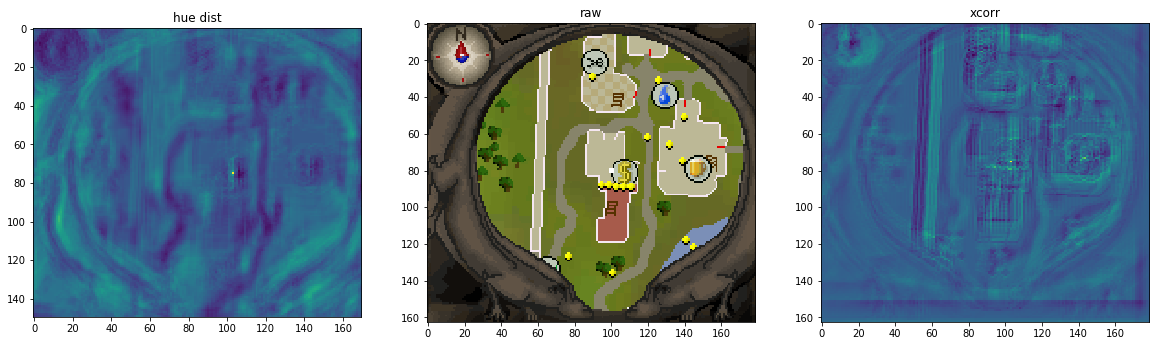

In [72]:
minimap = get_minimap()

icon = load_image('bank_icon.png')
a = find_bitmap_prob(icon,minimap)
b = find_bitmap_prob(icon,minimap,mode='xcorr')
fig = plt.figure(figsize=[20,7])
ax = fig.add_subplot(131)
ax.set_title('hue dist')
plt.imshow(-a)
ax = fig.add_subplot(132)
ax.set_title('raw')
plt.imshow(minimap)
ax = fig.add_subplot(133)
ax.set_title('xcorr')
plt.imshow(b)

(0, 10)

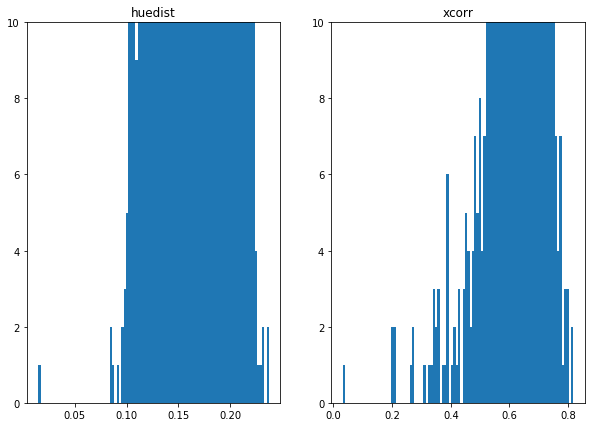

In [73]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(121)
ax.set_title('huedist')
plt.hist(a.reshape((-1)),bins=100)
plt.ylim(0,10)
ax = fig.add_subplot(122)
ax.set_title('xcorr')
plt.hist((result).reshape((-1)),bins=100)
plt.ylim(0,10)

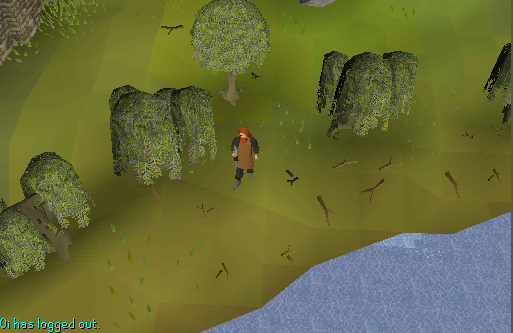

In [98]:
target()
mainscreen = get_mainscreen()
Image.fromarray(mainscreen)

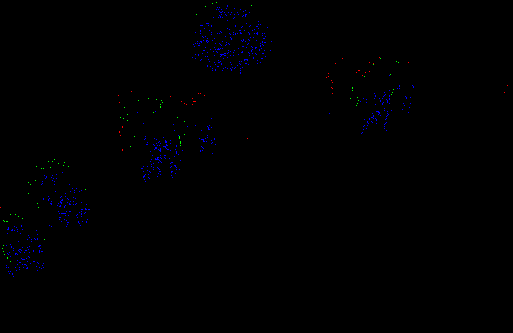

In [99]:
a = find_colors([120,96,73],mainscreen,tol=0.05,mode='hsl')
c = find_colors([136,160,42],mainscreen,tol=0.05,mode='hsl')
trees = filter_near(a,c,20)
#a,counts = cluster(a)
#a = np.concatenate(a[counts<20])

highlight = np.zeros_like(mainscreen,dtype='uint8')
highlight[a[:,1],a[:,0]] = [255,0,0]
highlight[c[:,1],c[:,0]] = [0,0,255]
highlight[trees[:,1],trees[:,0]] = [0,255,0]

Image.fromarray(highlight)